In [1]:
# Loads Boston dataset
from tensorflow import keras
from keras.datasets import boston_housing
from keras import layers
import numpy as np

(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [2]:
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# Note test data is normalized using training data parameters
test_data -= mean
test_data /= std

In [3]:
# Building the model
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1)
    ])

    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [4]:
# K-fold-validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                        train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                        train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


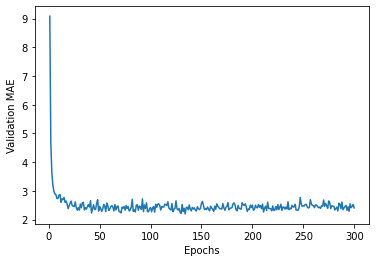

In [5]:
# Plot of MAE average history (average over k-fold)
import matplotlib.pyplot as plt
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

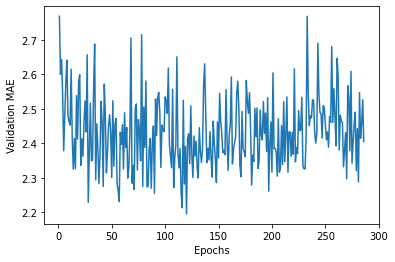

In [6]:
#Zoom into the plot
truncated_mae_history = average_mae_history[14:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [7]:
# Training best model on all data
model = build_model()
model.fit(train_data, train_targets,
epochs=200, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 11.0914 - mae: 2.3617


In [8]:
# Final result
test_mae_score

2.361652374267578